In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)


Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [4]:
df = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=False, remove=('headers', 'footers', 'quotes'))
texts = df['data']
labels = df['target']

## Preprocessing

In [17]:
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2 , max_features=3)
X = vectorizer.fit_transform(texts)

In [ ]:
inertia = []
cluster_range = range(2, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## Clustering Algorithms

In [18]:
# K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100)
kmeans_labels = kmeans.fit_predict(X)

In [20]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X.toarray())

In [21]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X.toarray())

## Evaluation

In [22]:
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_hierarchical = silhouette_score(X, hierarchical_labels)
silhouette_gmm = silhouette_score(X, gmm_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")
print(f"Silhouette Score for GMM: {silhouette_gmm}")

Silhouette Score for K-Means: 0.8596757516973642
Silhouette Score for Hierarchical Clustering: 0.8447970786788799
Silhouette Score for GMM: 0.8511370353230382


In [23]:
# Purity Score
def purity_score(y_true, y_pred):
    contingency_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity_kmeans = purity_score(labels, kmeans_labels)
purity_hierarchical = purity_score(labels, hierarchical_labels)
purity_gmm = purity_score(labels, gmm_labels)

print(f"Purity Score for K-Means: {purity_kmeans}")
print(f"Purity Score for Hierarchical Clustering: {purity_hierarchical}")
print(f"Purity Score for GMM: {purity_gmm}")

Purity Score for K-Means: 0.48724884080370945
Purity Score for Hierarchical Clustering: 0.47913446676970634
Purity Score for GMM: 0.4891808346213292


## Visualizations

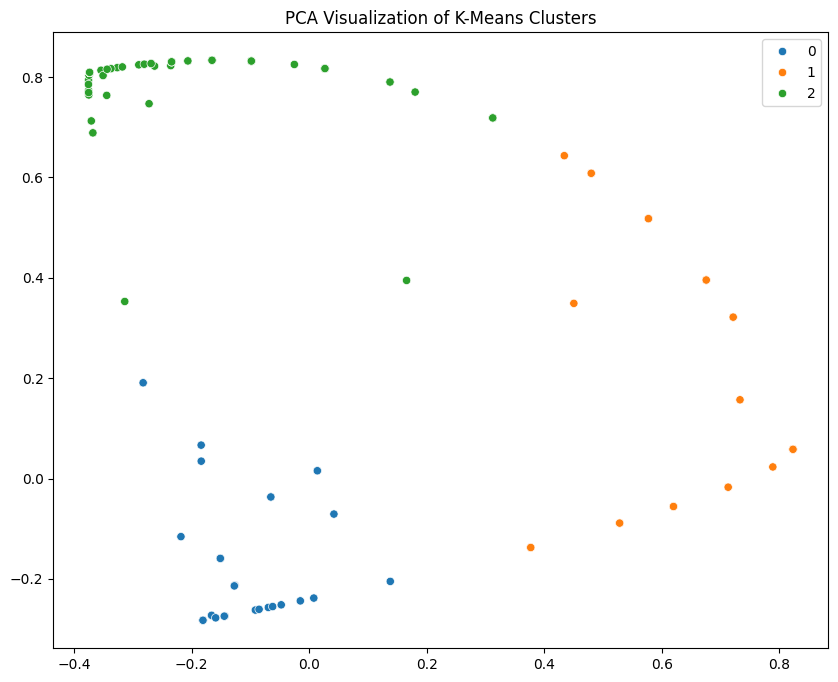

In [24]:
# PCA Visualization for K-Means
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="tab10")
plt.title("PCA Visualization of K-Means Clusters")
plt.show()

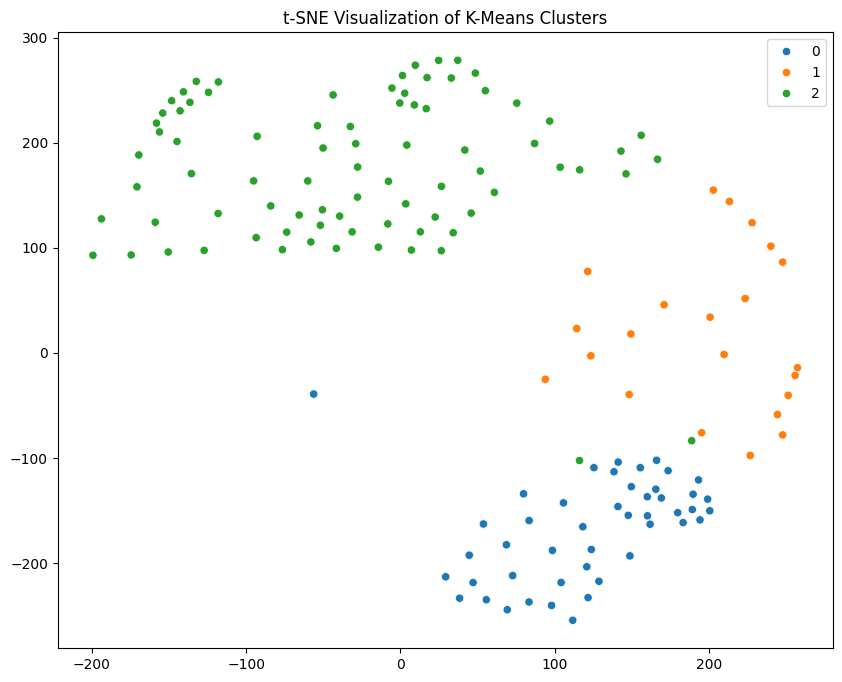

In [25]:
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette="tab10")
plt.title("t-SNE Visualization of K-Means Clusters")
plt.show()